In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter
"""
    # Parameter Details:
    learning_rate=A tensor or floating point value
    training_epochs=This is the epochs or intervals
    display_step=How much interval we want to acheive epochs values
    initial_accumulator_value= A floating point value. Starting value for the accumulators, must be positive.
    l1_regularization_strength=A float value, must be greater than or equal to zero
    l2_regularization_strength=A float value, must be greater than or equal to zero

"""
learning_rate=0.01
training_epochs=1000
display_step=50
initial_accumulator_value=0.1
l1_regularization_strength=0.0
l2_regularization_strength=0.0
use_locking=False
name='ProximalAdagrad'

In [3]:
# Training Data
train_x=np.asarray([3.3,4.4,5.5,6.6,7.7,8.8,9.9,2.3,4.5])
train_y=np.asarray([1.3,2.4,3.5,4.6,5.7,6.8,7.9,.3,2.5])
n_samples=train_x.shape[0]

In [4]:
# tf graph Input
X=tf.placeholder("float")
Y=tf.placeholder("float")

In [5]:
#set model weight
W=tf.Variable(np.random.randn(), name="weight")
b=tf.Variable(np.random.randn(), name="bias")

In [6]:
#construct linear model
pred=tf.add(tf.multiply(X,W),b)

In [7]:
#Mean Squared error
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

In [10]:
# optimizer=tf.train.AdagradOptimize
optimizer=tf.train.ProximalAdagradOptimizer(learning_rate,initial_accumulator_value, l1_regularization_strength, l2_regularization_strength, use_locking, name).minimize(cost)

In [11]:
# assign the variable(ie assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.486764967 W= 0.626584 b= 0.604386
Epoch: 0100 cost= 0.463974953 W= 0.626948 b= 0.543748
Epoch: 0150 cost= 0.448281646 W= 0.631618 b= 0.499568
Epoch: 0200 cost= 0.435329318 W= 0.636408 b= 0.462835
Epoch: 0250 cost= 0.424094260 W= 0.640877 b= 0.430672
Epoch: 0300 cost= 0.414083093 W= 0.645005 b= 0.401713
Epoch: 0350 cost= 0.405003011 W= 0.648836 b= 0.375173
Epoch: 0400 cost= 0.396663040 W= 0.652414 b= 0.350549
Epoch: 0450 cost= 0.388929218 W= 0.655778 b= 0.32749
Epoch: 0500 cost= 0.381703794 W= 0.658959 b= 0.305745
Epoch: 0550 cost= 0.374912679 W= 0.661982 b= 0.285123
Epoch: 0600 cost= 0.368498385 W= 0.664865 b= 0.265474
Epoch: 0650 cost= 0.362414449 W= 0.667627 b= 0.246682
Epoch: 0700 cost= 0.356623501 W= 0.670278 b= 0.228649
Epoch: 0750 cost= 0.351094842 W= 0.672832 b= 0.211297
Epoch: 0800 cost= 0.345802426 W= 0.675297 b= 0.194559
Epoch: 0850 cost= 0.340724587 W= 0.67768 b= 0.178379
Epoch: 0900 cost= 0.335842460 W= 0.679989 b= 0.162709
Epoch: 0950 cost= 0.331139892 

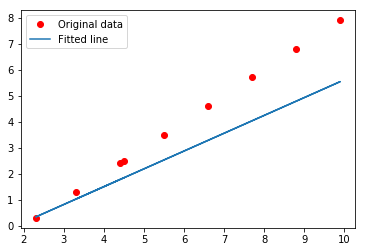

In [12]:
# start training
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epochs in range(training_epochs):
        for(x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            
        # Display epoch per steps
        
        if(epochs+1)%display_step==0:
            c=sess.run(cost,feed_dict={X:train_x,Y:train_y})
            print("Epoch:", '%04d' % (epochs+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
    print("optimization finished!")
    training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    #Graphic display
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W) * train_y + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()      